# Instacart Basket Data Analysis

### Content
1. Security implications
2. Customers' spending habits by geographic areas
2.1. High-, Low spenders by four US regions
2.2. Creating bar charts of High-, Low spenders by US region
2.3. Spending habits by price range (High, Mid, Low range products in customers order)  
2.4. Creating bar charts of High-, Mid-, Low range products in the customers' order by US region

## Importing libraris

In [5]:
# Import analysis and visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing data

In [7]:
# Create Path
path=r'C:\Users\Oksana Stepanova\OneDrive\Документи\Instacart Basket Analysis'

In [8]:
# Import Instacart merged dataframe
df_instacart=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))

In [9]:
# Check for imported data
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spender_flag,median_days_prior_order,order_frequency_flag,gender,states,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
df_instacart.shape

(32399732, 31)

In [11]:
# Check for the data type and columns name
df_instacart.dtypes

order_id                     int32
user_id                      int32
order_number                 int16
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float64
first_order                   bool
product_id                   int32
add_to_cart_order            int16
reordered                     int8
product_name                object
aisle_id                     int16
department_id                 int8
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_slowest_days        object
busiest_period_of_day       object
max_order                    int16
loyalty_flag                object
average_spending           float64
spender_flag                object
median_days_prior_order    float64
order_frequency_flag        object
gender                      object
states                      object
age                           int8
date_joined                 object
number_dependants   

## 1. Security implications 

### In the Instacart dataframe, customers' first and last names are considered personal data (PII). The first and last name columns were removed in the previous exercise to reduce file size since we will not be using this data in our analysis. Another important reason to omit these columns is to prevent disclosure of personal information. Apart from the first and last name, there is other sensitive information such as gender, age, family status, income. However, without reference to the person’s first and last name this data could be used for analysis

## 2. Customers' spending habits by geographic areas

### 2.1. High-, Low spenders by four US regions  

In [17]:
# Check for the variable in the 'state' column
df_instacart['states'].value_counts(dropna=False)

states
Pennsylvania            667007
California              659695
Rhode Island            656777
Georgia                 656249
New Mexico              654400
Arizona                 653864
North Carolina          651790
Oklahoma                651661
Alaska                  648451
Minnesota               647738
Massachusetts           646275
Wyoming                 644191
Virginia                641280
Missouri                640576
Texas                   640285
Colorado                639173
Maine                   638479
North Dakota            638391
Alabama                 637863
Kansas                  637418
Louisiana               637414
Delaware                636906
South Carolina          636677
Oregon                  636332
Arkansas                636070
Nevada                  636034
New York                635912
Montana                 635181
South Dakota            633649
Illinois                632928
Hawaii                  632786
Washington              632722
M

In [18]:
# Create the list of Northeast states
northeast=['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [19]:
# Create the list of Midwest states
midwest=['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [20]:
# Create the list of South states
south=['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [21]:
# Create the list of West states
west=['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [22]:
# Create a new column 'regions' and assign Northeast region
df_instacart.loc[df_instacart['states'].isin(northeast), 'regions']='Northeast'

In [23]:
# Assign Midwest flag in the new column 'regions'
df_instacart.loc[df_instacart['states'].isin(midwest), 'regions']='Midwest'

In [24]:
# Assign South region flag in the new column 'regions'
df_instacart.loc[df_instacart['states'].isin(south), 'regions']='South'

In [25]:
# Assign West region flag in the new column 'regions'
df_instacart.loc[df_instacart['states'].isin(west), 'regions']='West'

In [26]:
# Check for the frequency of values in the 'regions' column
df_instacart['regions'].value_counts(dropna=False)

regions
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [32]:
# Check for variable in the 'spender flag' column
df_instacart['spender_flag'].value_counts(dropna=False)

spender_flag
Low spender     32280013
High spender      119719
Name: count, dtype: int64

In [35]:
# Create a cross table of High-, Low spenders by region 
spender_by_region2=pd.crosstab(df_instacart['regions'], df_instacart['spender_flag'], dropna=False).sort_values(by='High spender', ascending=False)

In [37]:
# Check for the output
spender_by_region2

spender_flag,High spender,Low spender
regions,,
South,40577,10749519
West,31238,8260441
Midwest,29265,7566800
Northeast,18639,5703253


In [41]:
# Filter out High- and Low spenders
high_spenders=df_instacart[df_instacart['spender_flag']=='High spender']
low_spender=df_instacart[df_instacart['spender_flag']=='Low spender']

In [42]:
# Group High and Low spenders by region
high_spenders_count=high_spenders.groupby('regions').size()

In [43]:
# Check for High spenders output
high_spenders_count.head()

regions
Midwest      29265
Northeast    18639
South        40577
West         31238
dtype: int64

In [44]:
# Group Low spenders by region
low_spenders_count=low_spender.groupby('regions').size()

In [45]:
# Check for Low spenders output
low_spenders_count.head()

regions
Midwest       7566800
Northeast     5703253
South        10749519
West          8260441
dtype: int64

### 2.2. Creating bar charts of High-, Low spenders by US region

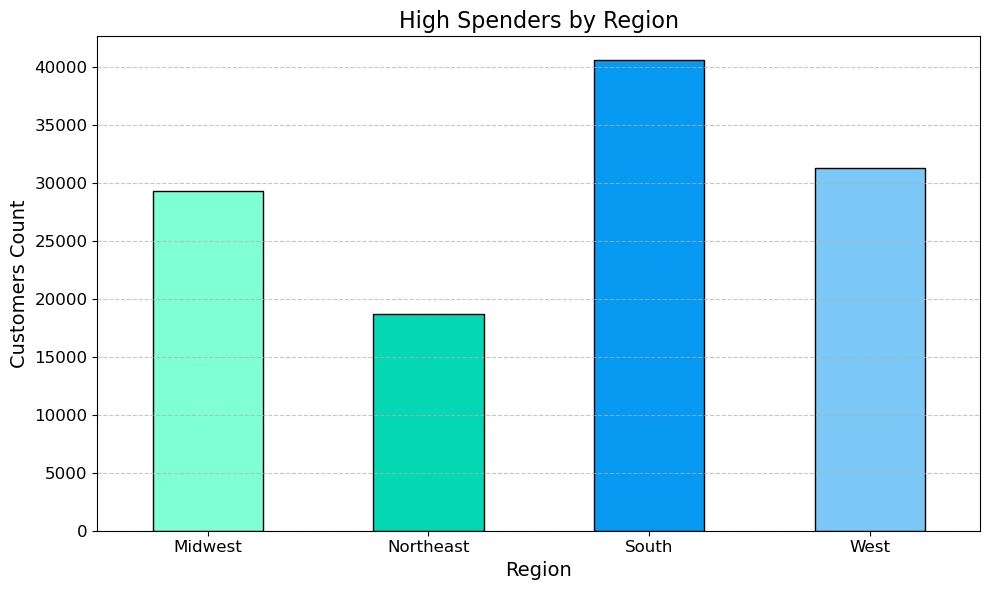

In [51]:
# Define bar chart colors
colors=['#7fffd4', '#04d8b2', '#069af3', '#7bc8f6']

# Customize figure size
plt.figure(figsize=(10, 6))

# Create bar chart for High spenders and save it as an object
bar_high_spenders_regions=high_spenders_count.plot(kind='bar', edgecolor='black', color=colors)     
                                                     
# Add title and axis labels
plt.title('High Spenders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customers Count', fontsize=14)

# Customize tick lables
plt.xticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# Save the bar chart High spenders by Region 
bar_high_spenders_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_high_spenders_by_region.png'))

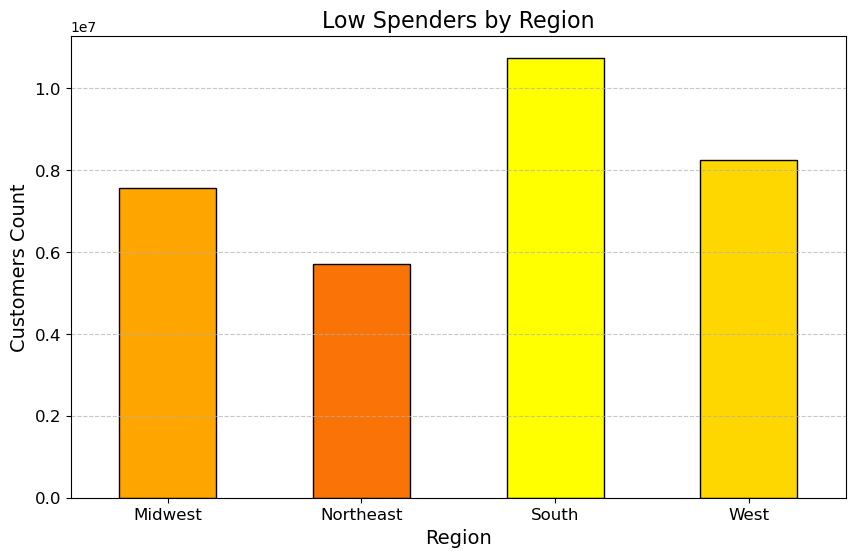

In [58]:
# Define bar chart colors
colors2=['#ffa500', '#f97306', '#ffff00', '#ffd700']

# Customize figure size
plt.figure(figsize=(10, 6))

# Create bar chart for Low spenders and save it as an object
bar_low_spenders_regions=low_spenders_count.plot(kind='bar', edgecolor='black', color=colors2)     
                                                     
# Add title and axis labels
plt.title('Low Spenders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customers Count', fontsize=14)

# Customize tick lables
plt.xticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [59]:
# Save the bar chart Low spenders by Region 
bar_low_spenders_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_low_spenders_by_region.png'))

In [60]:
# Calculate the total number of High and Low spenders
total_high_low_spenders=high_spenders_count.sum()+low_spenders_count.sum()

In [62]:
# Check for the output of total customers
total_high_low_spenders

32399732

In [64]:
# Calculate the percentage of High and Low spenders
percentage_high_spenders=(high_spenders_count/total_high_low_spenders)*100
percentage_low_spenders=(low_spenders_count/total_high_low_spenders)*100

In [65]:
# Check for the output of percentage of High spenders
percentage_high_spenders

regions
Midwest      0.090325
Northeast    0.057528
South        0.125239
West         0.096414
dtype: float64

In [66]:
# Check for the output of percentage of Low spenders
percentage_low_spenders

regions
Midwest      23.354514
Northeast    17.602778
South        33.177802
West         25.495399
dtype: float64

In [69]:
# Define the number of regions
number_regions=len(high_spenders_count.index)

In [70]:
# Check for the output of number of regions
number_regions

4

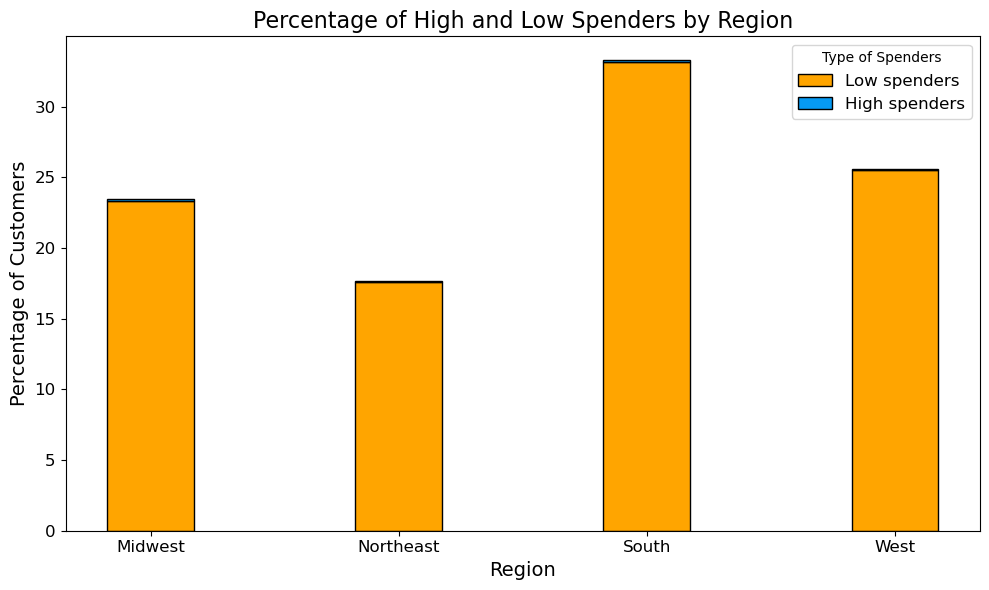

In [74]:
# Set the bar width
bar_width=0.35

# Creat the figure and axis for the bar chart
fig, ax=plt.subplots(figsize=(10, 6))

# Set x locations for the bar chart
x=range(number_regions)

# Create a bar chart for the percentage of Low spenders
bar_low_spenders_percent=ax.bar(x, percentage_low_spenders, bar_width, edgecolor='black', color='#ffa500', label='Low spenders')

# Create a bar chart for the percentage of High spenders
bar_high_spenders_percent=ax.bar(x, percentage_high_spenders, bar_width, bottom=percentage_low_spenders, edgecolor='black', color='#069af3', label='High spenders')

# Add title and axis labels
plt.title('Percentage of High and Low Spenders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Percentage of Customers', fontsize=14)

# Customize tick labels
plt.xticks(x, high_spenders_count.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Customize legends
ax.legend(title='Type of Spenders', fontsize=12)

# Show the bar chart
plt.tight_layout()
plt.show()

In [77]:
# Save the object 
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_percentage_low_high_spenders.png'))

### 2.3. Spending habits by price range (High, Mid, Low range products in customers order)  

In [79]:
# Check for variables of products by reice range
df_instacart['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid range product     21860860
Low range product     10126321
High range product      412551
Name: count, dtype: int64

In [80]:
# Create a cross table of price range by region 
price_range_by_region=pd.crosstab(df_instacart['regions'], df_instacart['price_range_loc'], dropna=False).sort_values(by='High range product', ascending=False)

In [81]:
# Check for the output
price_range_by_region

price_range_loc,High range product,Low range product,Mid range product
regions,,,
South,137601,3368338,7284157
West,105934,2592736,5593009
Midwest,96658,2372304,5127103
Northeast,72358,1792943,3856591


In [82]:
# filter out customers by the price range per item in the order
high_range_prods=df_instacart[df_instacart['price_range_loc']=='High range product'] # price exceeds 15 per item
mid_range_prods=df_instacart[df_instacart['price_range_loc']=='Mid range product'] # price per item is above 5 and lower or equal to 15
low_range_prods=df_instacart[df_instacart['price_range_loc']=='Low range product'] # price is lower or equal to 5 

In [83]:
# Group High, Mid and Low range products by region
high_range_prods_count=high_range_prods.groupby('regions').size()
mid_range_prods_count=mid_range_prods.groupby('regions').size()
low_range_prods_count=low_range_prods.groupby('regions').size()

In [84]:
# Check for High range prods output
high_range_prods_count

regions
Midwest       96658
Northeast     72358
South        137601
West         105934
dtype: int64

In [85]:
# Check for Mid range prods output
mid_range_prods_count

regions
Midwest      5127103
Northeast    3856591
South        7284157
West         5593009
dtype: int64

In [86]:
# Check for Low range prods output
mid_range_prods_count

regions
Midwest      5127103
Northeast    3856591
South        7284157
West         5593009
dtype: int64

### 2.4. Creating bar charts of High-, Mid-, Low range products in the customers' order by US region

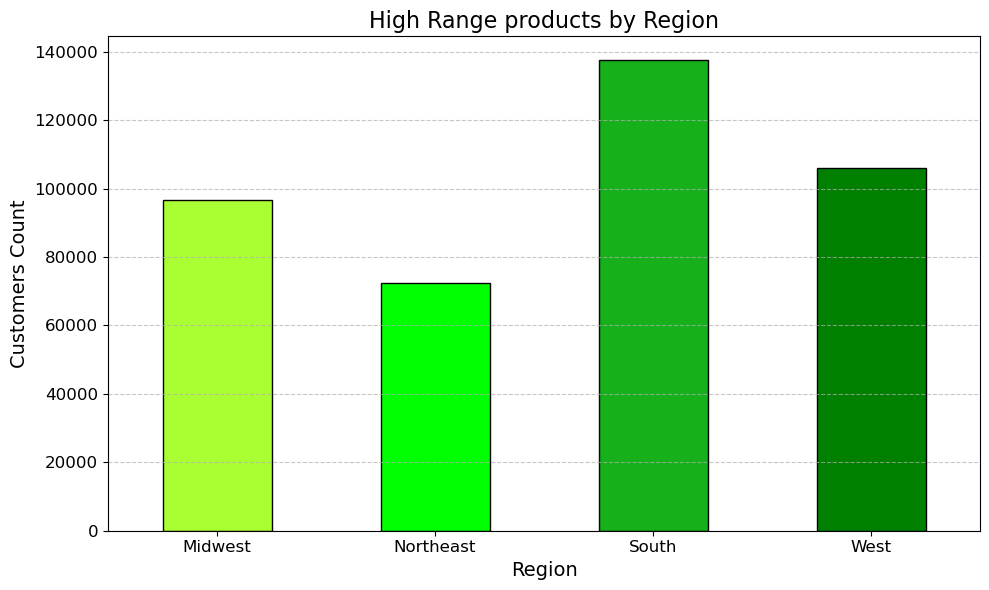

In [91]:
# Define bar chart colors
colors3=['#aaff32', '#00ff00', '#15b01a', '#008000']

# Customize figure size
plt.figure(figsize=(10, 6))

# Create bar chart for High range products and save it as an object
bar_high_range_prods_regions=high_range_prods_count.plot(kind='bar', edgecolor='black', color=colors3) 

# Add title and axis labels
plt.title('High Range products by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customers Count', fontsize=14)

# Customize tick lables
plt.xticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [92]:
# Save the bar chart High range products by Region 
bar_high_range_prods_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_high_range_prods_by_region.png'))

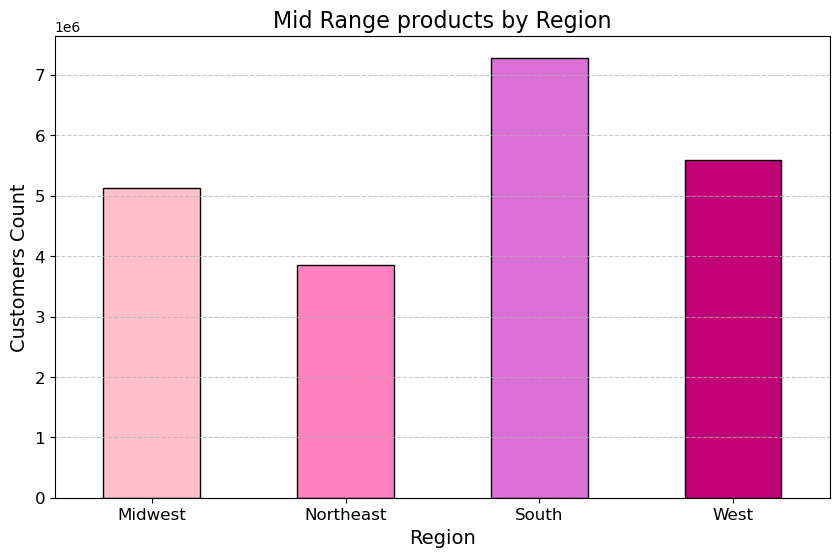

In [93]:
# Define bar chart colors
colors4=['#ffc0cb', '#ff81c0', '#da70d6', '#c20078']

# Customize figure size
plt.figure(figsize=(10, 6))

# Create bar chart for Mid range products and save it as an object
bar_mid_range_prods_regions=mid_range_prods_count.plot(kind='bar', edgecolor='black', color=colors4) 

# Add title and axis labels
plt.title('Mid Range products by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customers Count', fontsize=14)

# Customize tick lables
plt.xticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [94]:
# Save the bar chart Mid range products by Region 
bar_mid_range_prods_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_mid_range_prods_by_region.png'))

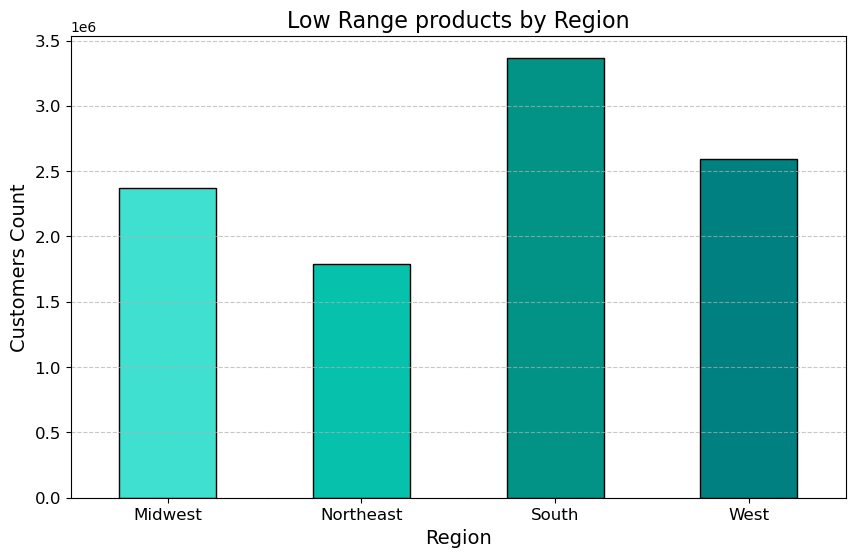

In [95]:
# Define bar chart colors
colors5=['#40e0d0', '#06c2ac', '#029386', '#008080']

# Customize figure size
plt.figure(figsize=(10, 6))

# Create bar chart for Low range products and save it as an object
bar_low_range_prods_regions=low_range_prods_count.plot(kind='bar', edgecolor='black', color=colors5) 

# Add title and axis labels
plt.title('Low Range products by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customers Count', fontsize=14)

# Customize tick lables
plt.xticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [96]:
# Save the bar chart Low range products by Region 
bar_low_range_prods_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_low_range_prods_by_region.png'))

In [97]:
# Define the number of regions
number_regions_range=len(high_range_prods_count.index)

In [98]:
# Check for the output of number_regions_range
number_regions_range

4

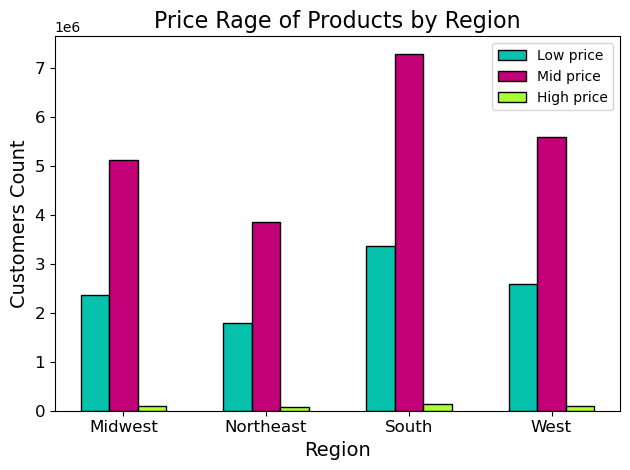

In [133]:
# Set the bar width
bar_width=0.2

# Set x locations for the bar chart
x=np.arange(number_regions_range)

# Create a bar chart for Low range products
# such that it will be placed to the left
multi_bar_low_range_prods=plt.bar(x-bar_width, low_range_prods_count, bar_width, edgecolor='black', color='#06c2ac', label='Low price')

# Create a bar chart for Mid range products
multi_bar_mid_range_prods=plt.bar(x, mid_range_prods_count, bar_width, edgecolor='black', color='#c20078', label='Mid price')

# Create a bar chart for High range products
# such that it will be placed to the right
multi_bar_high_range_prods=plt.bar(x+bar_width, high_range_prods_count, bar_width, edgecolor='black', color='#aaff32', label='High price')

# Add title and axis labels
plt.title('Price Rage of Products by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customers Count', fontsize=14)

# Customize tick labels
plt.xticks(x, high_range_prods_count.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Customize legends
plt.legend(title='Price Range', fontsize=12)
plt.legend()

# Show and save the bar chart
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'multi_bar_price_range_prods_by_region.png'))
plt.show()